In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('NAZDAQ-modelling.csv')
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

In [3]:
df.head()

,open,high,low,close,volume,change_percent,avg_vol_20d,daily_middle,dayNumber,year,...,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,target
date,,,,,,,,,,,,,,,,,,,,,
1985-10-28,113.91,113.910,113.205,113.820,131460000,-0.08,159366000.0,113.5575,28,1985,...,False,False,False,False,False,False,True,False,False,1.0
1985-10-29,113.82,115.735,113.805,115.400,163400000,1.39,159878000.0,114.7700,29,1985,...,False,False,False,False,False,False,True,False,False,1.0
1985-10-30,115.40,116.125,115.340,115.770,196040000,0.32,161448000.0,115.7325,30,1985,...,False,False,False,False,False,False,True,False,False,0.0
1985-10-31,115.77,116.110,115.155,115.480,169920000,-0.25,162579000.0,115.6325,31,1985,...,False,False,False,False,False,False,True,False,False,1.0
1985-11-01,115.48,116.775,115.480,116.275,180180000,0.69,164193000.0,116.1275,1,1985,...,False,False,False,False,False,False,False,True,False,0.0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,9531.0,3.035760e+03,3.701707e+03,1.138200e+02,4.471600e+02,1.665160e+03,3.810110e+03,1.664477e+04
high,9531.0,3.060936e+03,3.730119e+03,1.139100e+02,4.503550e+02,1.682770e+03,3.858690e+03,1.676486e+04
low,9531.0,3.009178e+03,3.671003e+03,1.132050e+02,4.428900e+02,1.648650e+03,3.783455e+03,1.652383e+04
close,9531.0,3.036443e+03,3.702426e+03,1.138200e+02,4.477850e+02,1.665070e+03,3.809225e+03,1.657334e+04
volume,9531.0,1.641765e+09,1.321090e+09,3.174000e+07,4.813500e+08,1.672340e+09,2.080555e+09,1.162119e+10
change_percent,9531.0,6.480537e-02,1.653416e+00,-1.508000e+01,-6.700000e-01,1.200000e-01,8.400000e-01,1.877000e+01
avg_vol_20d,9531.0,1.636985e+09,1.278210e+09,1.593660e+08,4.806650e+08,1.740965e+09,2.046418e+09,8.052748e+09
daily_middle,9531.0,3.035057e+03,3.700474e+03,1.135575e+02,4.466125e+02,1.665090e+03,3.813655e+03,1.657484e+04
dayNumber,9531.0,1.573466e+01,8.748869e+00,1.000000e+00,8.000000e+00,1.600000e+01,2.300000e+01,3.100000e+01
year,9531.0,2.004211e+03,1.092635e+01,1.985000e+03,1.995000e+03,2.004000e+03,2.014000e+03,2.023000e+03


In [5]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change_percent',
       'avg_vol_20d', 'daily_middle', 'dayNumber', 'year', 'is_quarter_end',
       'Moving5DayClose', 'Moving10DayClose', 'Moving20DayClose',
       'all_time_high', 'yearly_max_to_date', 'yearly_min_to_date',
       'yearly_avg_to_date', 'monthly_max_to_date', 'monthly_min_to_date',
       'monthly_avg_to_date', 'cumulativechange', 'run', 'DecreasingMA5-10',
       'DecreasingMA5-20', 'DecreasingMA10-20', 'day_Tuesday', 'day_Wednesday',
       'day_Thursday', 'day_Friday', 'month_February', 'month_March',
       'month_April', 'month_May', 'month_June', 'month_July', 'month_August',
       'month_September', 'month_October', 'month_November', 'month_December',
       'target'],
      dtype='object')

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler

# Split data into features (X) and target (y)
X = df.drop(['target'], axis=1)  # Features
y = df["target"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the RobustScaler to the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use RandomOverSampler to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_scaled, y_train)

# Create and train a logistic regression model using the scaled features and balanced data
model = LogisticRegression(max_iter=5000)
model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the scaled features
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Additional evaluation metrics
print(classification_report(y_test, y_pred))


Accuracy: 0.54
              precision    recall  f1-score   support

         0.0       0.49      0.55      0.52       857
         1.0       0.59      0.52      0.55      1050

    accuracy                           0.54      1907
   macro avg       0.54      0.54      0.54      1907
weighted avg       0.54      0.54      0.54      1907



Looking at the predicted probabilities, there may be some relationship between the "certainty" of the predictions and the accuracy. To explore this I will extract the predicted probabilities and create a new data frame that also contains the target variable and predicted variable.

In [8]:
# Get probabilities for target classes (0 and 1)
y_probs = model.predict_proba(X_test_scaled)

# Create a DataFrame with target, predicted class, and probabilities
result_df = pd.DataFrame({'Target': y_test, 'Predicted': y_pred, 'Probability_0': y_probs[:, 0], 'Probability_1': y_probs[:, 1]})


In [9]:
result_df.describe()

,Target,Predicted,Probability_0,Probability_1
count,1907.000000,1907.000000,1907.000000,1907.000000
mean,0.550603,0.490299,0.500656,0.499344
std,0.497563,0.500037,0.042224,0.042224
min,0.000000,0.000000,0.333577,0.257800
25%,0.000000,0.000000,0.473931,0.472699
50%,1.000000,0.000000,0.500855,0.499145
75%,1.000000,1.000000,0.527301,0.526069
max,1.000000,1.000000,0.742200,0.666423


In [10]:
result_df['Correct Prediction'] = np.where(result_df['Target'] == result_df['Predicted'], True, False)


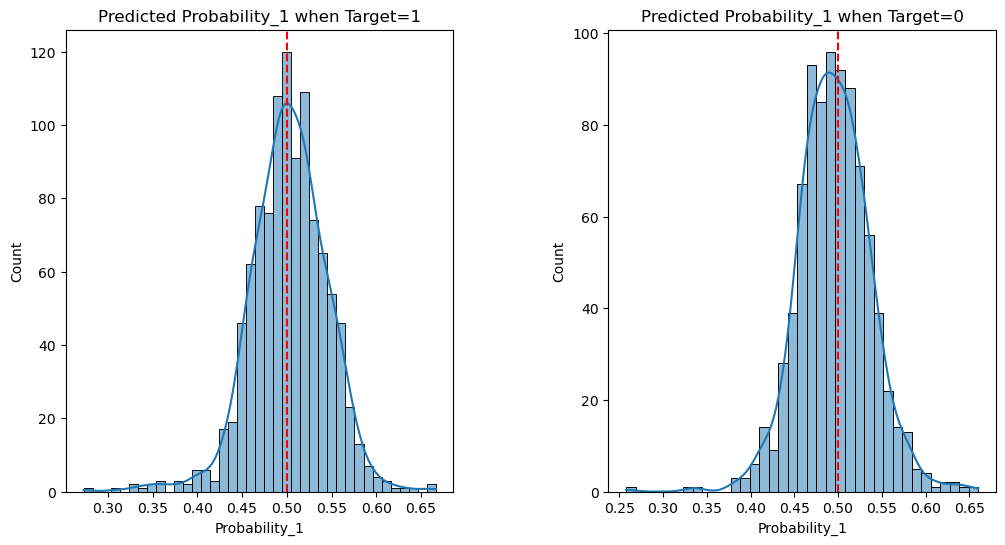

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for histograms
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

# Histogram for predicted Probability_1 when target is 1
plt.subplot(1, 2, 1)
sns.histplot(result_df[(result_df['Target'] == 1)]['Probability_1'], kde=True)
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title("Predicted Probability_1 when Target=1")
plt.xlabel("Probability_1")
plt.ylabel("Count")

# Histogram for predicted Probability_0 when target is 0
plt.subplot(1, 2, 2)
sns.histplot(result_df[(result_df['Target'] == 0)]['Probability_1'], kde=True)
plt.axvline(x=0.5, color='r', linestyle='--')
plt.title("Predicted Probability_1 when Target=0")
plt.xlabel("Probability_1")
plt.ylabel("Count")

plt.show()


Above we can see the predicted probability for class 1 - the signal to buy. The red line represents the default decision boundary. The main issue that is apparent is that there are a large number of results on the incorrect side of the decision boundaries for both classes. There is a small skew in the correct direction for Class 1 but for Class 0 the model is actually skewed towards the incorrect class prediction.

I had hoped there would be a much larger skew in the correct direction for both classes. If this were the case I would be able to manually select decision boundaries that would massively improve precision. In the context of the stock market, this is useful as you want to have a high degree of accuracy when you do choose to invest. There is the drawback of missing many days where you could invest and experience an increase in value, but with that comes the increased risk of losing money.

## Linear Regression for Precision

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, classification_report
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler

# Split data into features (X) and target (y)
X = df.drop(['target'], axis=1)  # Features
y = df["target"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the RobustScaler to the training data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use RandomOverSampler to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train_scaled, y_train)

# Define hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga']  # Solvers
}

# Create a Logistic Regression model
model = LogisticRegression(max_iter=5000)

# Use GridSearchCV for hyperparameter tuning with precision scoring
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1, refit=False)
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new model with the best hyperparameters
best_model = LogisticRegression(max_iter=5000, **best_params)
best_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
precision = precision_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print(f"Precision with Best Model: {precision:.2f}")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'C': 0.001, 'solver': 'liblinear'}
Precision with Best Model: 0.58
              precision    recall  f1-score   support

         0.0       0.48      0.54      0.51       857
         1.0       0.58      0.52      0.55      1050

    accuracy                           0.53      1907
   macro avg       0.53      0.53      0.53      1907
weighted avg       0.54      0.53      0.53      1907



## Random Forest for Precision

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Split data into features (X) and target (y)
X = df.drop(['target'], axis=1)  # Features
y = df["target"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomOverSampler to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'class_weight': ['balanced', None],  # Class weights
}

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning with precision scoring
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1, refit=False)
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new model with the best hyperparameters
best_model = RandomForestClassifier(random_state=42, **best_params)
best_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
precision = precision_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print(f"Precision with Best Model: {precision:.2f}")
print(classification_report(y_test, y_pred))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Split data into features (X) and target (y)
X = df.drop(['next_day_change_percentage', 'target'], axis=1)  # Features
y = df["target"]  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RandomOverSampler to balance the classes
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)

# Define hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000],
}

# Create an MLPClassifier model
model = MLPClassifier(random_state=42)

# Use GridSearchCV for hyperparameter tuning with precision scoring
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision', n_jobs=-1, refit=False)
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new model with the best hyperparameters
best_model = MLPClassifier(random_state=42, **best_params)
best_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
precision = precision_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print(f"Precision with Best Model: {precision:.2f}")
print(classification_report(y_test, y_pred))


In [ ]:
# Generate and plot the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()